In [1]:
import pandas as pd
import os #helps me navigate with my folders as had issues locating folders for the files and print(os.getcwd)) does magic!
import matplotlib.pyplot as plt

df = pd.read_csv('../data/sample_data.csv')

print('Data preview:')
print(df.head(), '\n')
print('Columns:')
print(df.columns, '\n')

#Let's convert 'Kwota' colums to numbers with .to_numeric function from Pandas
df['Kwota'] = pd.to_numeric(df['Kwota'], errors = 'coerce')

#Let's separate incomes and expenses and sum them up
incomes = df[df['Kwota'] > 0]['Kwota'].sum()
expenses = df[df['Kwota'] < 0]['Kwota'].sum()

print(f'Sum of incomes: {incomes:.2f}')
print(f'Sum of expenses: {expenses:.2f}')
print(f'Balance: {incomes + expenses:.2f}')



Data preview:
  Data operacji Data waluty        Typ transakcji   Kwota Waluta  \
0    2025-07-01  2025-07-01        Płatność kartą   -45.6    PLN   
1    2025-07-02  2025-07-02  Przelew przychodzący  1500.0    PLN   
2    2025-07-03  2025-07-03      Wypłata bankomat  -200.0    PLN   
3    2025-07-04  2025-07-04        Płatność kartą  -120.3    PLN   
4    2025-07-05  2025-07-05    Przelew wychodzący  -350.0    PLN   

   Saldo po transakcji       Opis transakcji Kolumna8 Kolumna9 Kolumna10  \
0               9954.4     Sklep spożywczy X     X123     X567      X324   
1              11454.4    Wynagrodzenie ACME     X234     X765      X112   
2              11254.4  Bankomat PKO Wrocław     X876     X543      X210   
3              11134.1           Restauracja     X432     X111      X876   
4              10784.1     Czynsz mieszkanie     X654     X777      X908   

  Kolumna11 Kolumna12  
0      X888      X654  
1      X999      X321  
2      X765      X908  
3      X345      X222  


In [2]:
#Let's add 10 biggest spending from the file
top_expenses = df[df['Kwota'] < 0].sort_values(by='Kwota').head(10).reset_index(drop = True)
print('Top 10 expenses:')
print(top_expenses[['Data operacji', 'Kwota', 'Opis transakcji']])

Top 10 expenses:
  Data operacji    Kwota        Opis transakcji
0    2025-07-19 -1000.00      Kredyt hipoteczny
1    2025-07-29  -600.00     Przedszkole dzieci
2    2025-07-14  -500.00  Firma Ubezpieczeniowa
3    2025-07-10  -400.00  Bankomat PKO Warszawa
4    2025-07-05  -350.00      Czynsz mieszkanie
5    2025-07-23  -300.00    Bankomat PKO Kraków
6    2025-07-21  -250.50          Sklep meblowy
7    2025-07-03  -200.00   Bankomat PKO Wrocław
8    2025-07-04  -120.30            Restauracja
9    2025-07-30   -99.99                 Apteka


In [3]:
#Quick check to convert 'Data Operacji' to date (if not it will be change to NaT)
df['Data operacji'] = pd.to_datetime(df['Data operacji'], errors='coerce')

#Creates a table that shows how much was spent on particular date
daily_expenses = df[df['Kwota'] < 0].groupby(df['Data operacji'].dt.date)['Kwota'].sum()
daily_incomes = df[df['Kwota'] > 0].groupby(df['Data operacji'].dt.date)['Kwota'].sum()

daily = df.copy() # copy not to overwrite original df
daily['Przychody'] = daily['Kwota'].apply(lambda x: x if x > 0 else 0)
daily['Wydatki'] = daily['Kwota'].apply(lambda x: x if x < 0 else 0)

daily_balance = daily.groupby('Data operacji')[['Przychody', 'Wydatki']].sum()

print('Daily expenses report: \n')
print(daily_expenses.head(10))
print('Daily incomes report: \n')
print(daily_incomes.head(10))
print('Daily balance report: \n')
print(daily_balance.head(10))

Daily expenses report: 

Data operacji
2025-07-01     -45.60
2025-07-03    -200.00
2025-07-04    -120.30
2025-07-05    -350.00
2025-07-08     -89.99
2025-07-10    -400.00
2025-07-12     -15.20
2025-07-14    -500.00
2025-07-17     -39.99
2025-07-19   -1000.00
Name: Kwota, dtype: float64
Daily incomes report: 

Data operacji
2025-07-02    1500.0
2025-07-06    2000.0
2025-07-15     800.0
2025-07-27    1200.0
2025-07-31     500.0
Name: Kwota, dtype: float64
Daily balance report: 

               Przychody  Wydatki
Data operacji                    
2025-07-01           0.0   -45.60
2025-07-02        1500.0     0.00
2025-07-03           0.0  -200.00
2025-07-04           0.0  -120.30
2025-07-05           0.0  -350.00
2025-07-06        2000.0     0.00
2025-07-08           0.0   -89.99
2025-07-10           0.0  -400.00
2025-07-12           0.0   -15.20
2025-07-14           0.0  -500.00


Sum of expenses and incomes on particlar days: 


<Figure size 1000x500 with 0 Axes>

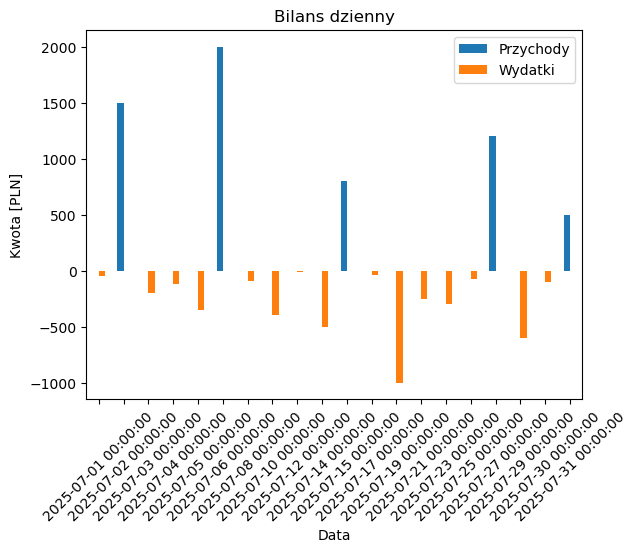

In [4]:
#Adding a chart showing sum od daily transactions
print('Sum of expenses and incomes on particlar days: ')
plt.figure(figsize=(10,5))
daily_balance.plot(kind="bar")
plt.title("Bilans dzienny")
plt.xlabel("Data")
plt.ylabel("Kwota [PLN]")
plt.xticks(rotation=45)
plt.show()

In [5]:
# Balance summary
# What was the biggest spending?

biggest_spending = df[df['Kwota'] < 0].sort_values('Kwota').iloc[0]

# What was the day with biggest spendings?

max_spending_day = daily_balance['Wydatki'].idxmin()
max_spending_sum = daily_balance['Wydatki'].min()

print('\n===== Balance Summary: =====')
print(f' Sum of incomes: {incomes:.2f} PLN')
print(f' Sum of spendings: {expenses:.2f} PLN')
print(f' Ending balance: {incomes + expenses:.2f} PLN')
print(f' Biggest spending: {biggest_spending['Kwota']:.2f} PLN ({biggest_spending['Opis transakcji']})')
print(f' Day with most spendings: {max_spending_day}: {max_spending_sum:.2f} PLN')
print('=================================\n')






===== Balance Summary: =====
 Sum of incomes: 6000.00 PLN
 Sum of spendings: -4087.47 PLN
 Ending balance: 1912.53 PLN
 Biggest spending: -1000.00 PLN (Kredyt hipoteczny)
 Day with most spendings: 2025-07-19 00:00:00: -1000.00 PLN

